<a href="https://colab.research.google.com/github/NBSPRG/ML-DL/blob/main/LeNet5_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D
from keras import Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the images to match the input shape of your model (32x32 with a single channel)
train_images = tf.image.resize(train_images[..., tf.newaxis], (32, 32))
test_images = tf.image.resize(test_images[..., tf.newaxis], (32, 32))


# LeNet-5 Architecture

In [4]:
model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5), padding='valid', activation='tanh', input_shape=(32, 32, 1)))
model.add(AveragePooling2D(pool_size=(5,5), strides=2, padding='valid'))

model.add(Conv2D(16, kernel_size=(5, 5), padding='valid', activation='tanh', input_shape=(32, 32, 1)))
model.add(AveragePooling2D(pool_size=(5,5), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 2, 2, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 120)               7

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
750/750 [==============================] - 4s 6ms/step - loss: 0.0449 - accuracy: 0.9860 - val_loss: 0.0754 - val_accuracy: 0.9787
Epoch 2/20
750/750 [==============================] - 4s 6ms/step - loss: 0.0411 - accuracy: 0.9871 - val_loss: 0.0669 - val_accuracy: 0.9798
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0403 - accuracy: 0.9869 - val_loss: 0.0675 - val_accuracy: 0.9805
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0381 - accuracy: 0.9873 - val_loss: 0.0632 - val_accuracy: 0.9815
Epoch 5/20
750/750 [==============================] - 5s 6ms/step - loss: 0.0378 - accuracy: 0.9875 - val_loss: 0.0693 - val_accuracy: 0.9807
Epoch 6/20
750/750 [==============================] - 4s 6ms/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.0680 - val_accuracy: 0.9803
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0340 - accuracy: 0.9890 - val_loss: 0.0644 - val_accuracy: 0.9818
Epoch 

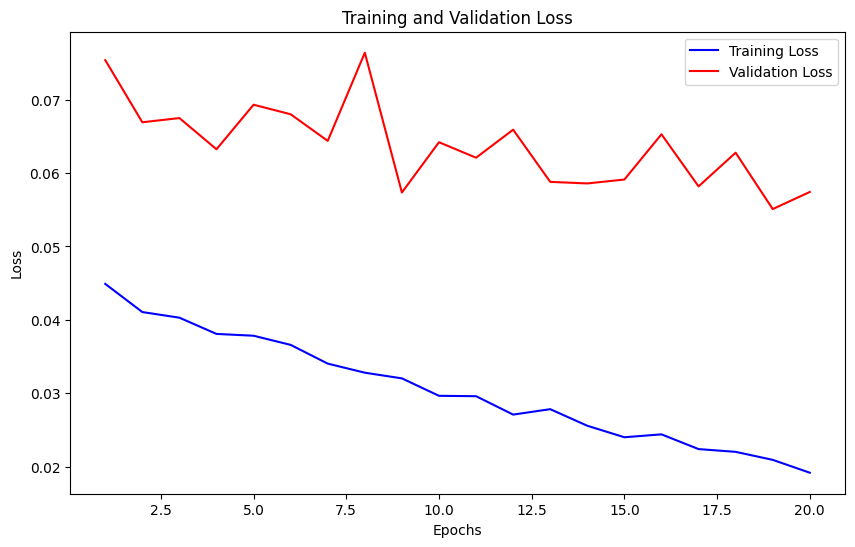

In [13]:
# Extract the training loss and validation loss from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a range of epoch numbers for x-axis
epochs = range(1, len(training_loss) + 1)

# Plot the training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
